In [49]:
import numpy as np
from tifffile import imread
from skimage.color import label2rgb
import matplotlib.pyplot as plt
from PIL import Image

color_list = [[255, 255, 255], [31, 119, 180], [255, 127, 14], [44, 160, 44],  [255, 0, 0]]
COLORS = np.array(color_list) / 255.0

In [50]:
from types import NoneType

def add_inset_zoom(xywh: list[int], fig_xywh: list[float], img_arr: np.ndarray, labels: np.ndarray | None, ax ) -> object:
    x0, y0, w, h = xywh
    fx, fy, fw, fh = fig_xywh
    H, W, C = img_arr.shape
    inset_data = np.zeros_like(img_arr)
    inset_data[y0:y0+h, x0:x0+w, :] = img_arr[y0:y0+h, x0:x0+w, :]

    extent = (0, H, W, 0)
    # 418 / 518, 0 / 518, 150 / 518, 150 / 518
    axin = ax.inset_axes(
        fig_xywh, xlim=(x0, x0+w), ylim=(y0, y0+h))
    axin.set_xticks([])
    axin.set_yticks([])
    #axin.set_axis_off()
    if type(labels) != NoneType:
        inset_data = label2rgb(labels, img_arr, COLORS[1:], kind='overlay', alpha=0.6, bg_label=-1)
        axin.imshow(inset_data,)
    else:
        axin.imshow(inset_data, cmap="binary_r",) # cmap="binary_r"
    ax.indicate_inset_zoom(axin, edgecolor="black", lw=2)
    axin.set_ylim((y0 + h, y0))

    axin.patch.set_edgecolor('black')  

    axin.patch.set_linewidth(4)  

    return axin

In [51]:
root_dir = 'fig_data/supp_wss_transforms'
img_with_labels = Image.open(f'{root_dir}/img_with_labels.png')

fnames = ["hybrid_stride14", "hybrid_stride14_plus_transforms", "hybrid_stride4", "hybrid_stride4_plus_transforms"]
titles = ["Image with labels", "Stride 14", "Stride 14 (+transforms)", "Stride 4", "Stride 4 (+transforms)"]

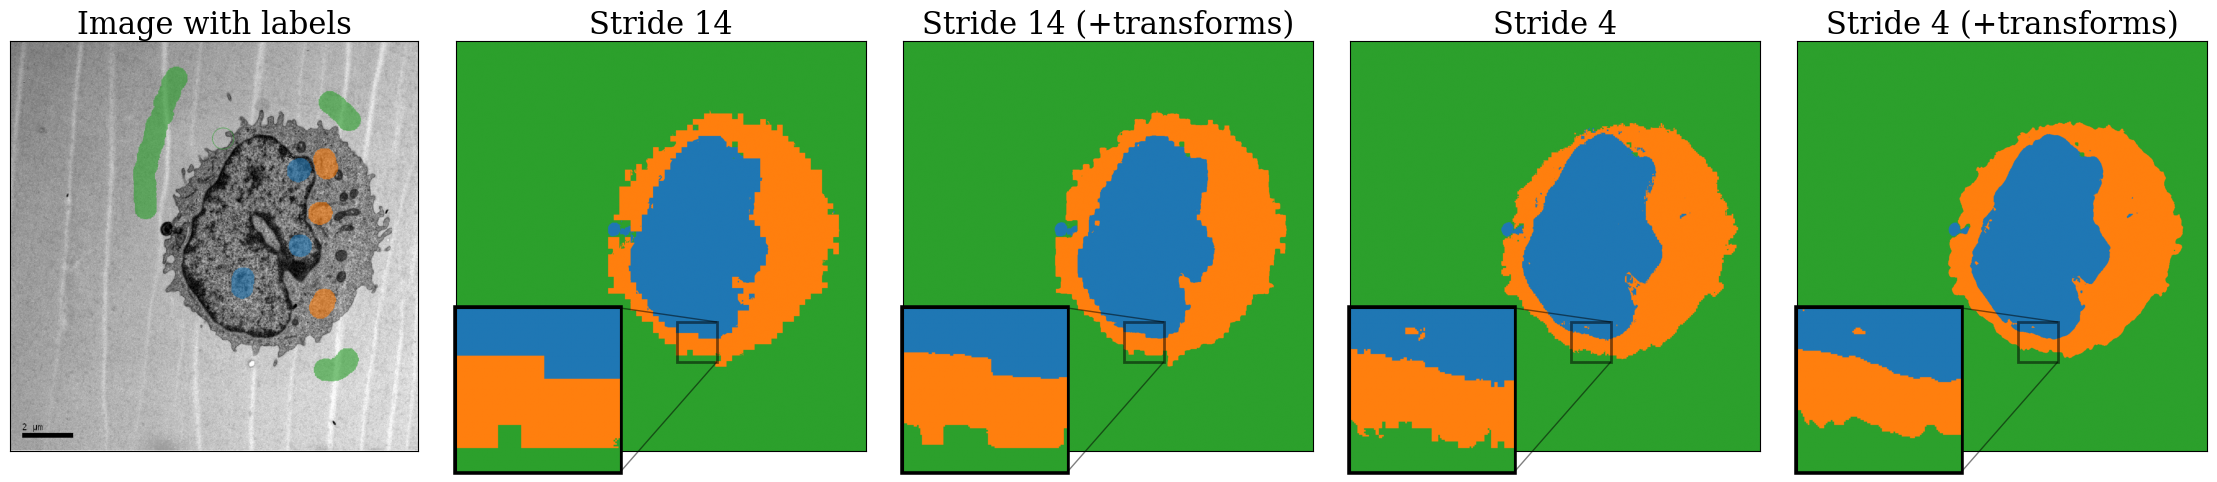

In [52]:
fig, axs = plt.subplots(nrows=1, ncols=5)
fig.set_size_inches(4.5 * 5, 4.5)
plt.rcParams["font.family"] = "serif"


for i, ax in enumerate(axs):
    if i == 0:
        ax.imshow(img_with_labels)
    else:
        data = imread(f"{root_dir}/{fnames[i- 1]}.tiff")
        recoloured = label2rgb(data[0], None, colors=COLORS[1:])
        ax.imshow(recoloured)
        

        add_inset_zoom([550, 700, 100, 100], [0.0, -0.05, 0.4, 0.4], recoloured, None, ax )

    ax.set_title(f"{titles[i]}", fontsize=22)
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()